In [2]:
import numpy as np 
import pandas as pd

In [3]:
import pandas as pd

dataFrame = pd.read_csv('spam.csv',encoding='cp1252')


In [4]:
df=dataFrame
dataFrame.shape


(5572, 5)

dataFrame as df

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2',"Unnamed: 3","Unnamed: 4"], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


converting or transforming the first column values in numeric form, because we can measure numeric amount. 

before this rename the column to better understanding


In [9]:
df.rename(columns={"v1":"result", "v2":"msg"}, inplace=True)

In [10]:
df.sample(4)

,result,msg
4935,ham,K..k.:)congratulation ..
887,ham,Y dun cut too short leh. U dun like ah? She fa...
1538,ham,Midnight at the earliest
878,spam,U have a secret admirer who is looking 2 make ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['result']=encoder.fit_transform(df['result'])

In [13]:
df['result']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: result, Length: 5572, dtype: int32

In [14]:
df.isnull().sum()

result    0
msg       0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
df.sample(5)

,result,msg
5069,1,5p 4 alfie Moon's Children in need song on ur ...
1904,0,Wah... Okie okie... Muz make use of e unlimite...
4719,0,Forgot to tell Ì_ smth.. Can Ì_ like number th...
1087,0,You can never do NOTHING
3552,0,Din i tell u jus now 420


In [19]:
df[df['result']==0]

,result,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
df[df['result']==1]

,result,msg
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
import matplotlib.pyplot as plot

([<matplotlib.patches.Wedge at 0x1fac212c700>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

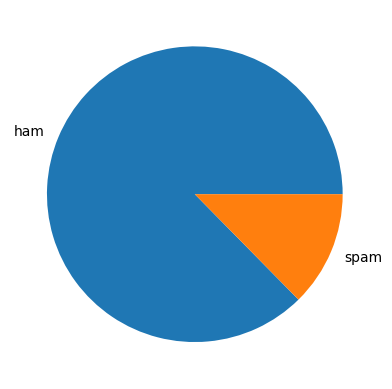

In [22]:
plot.pie(df['result'].value_counts(),labels=['ham','spam'])

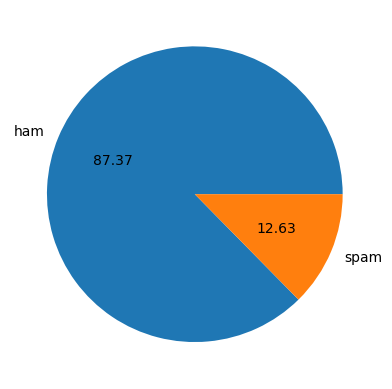

In [23]:
plot.pie(df['result'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plot.show()

we can conclude data is unblanced

In [24]:
import nltk


In [25]:
# df['character'] = []
# for i in df['msg']:
#     df["character"].append(len(i))
# print(d)

df['character'] = df['msg'].apply(len)


C:\Users\hp\AppData\Local\Temp\ipykernel_10012\4206198798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character'] = df['msg'].apply(len)


In [26]:
df.head()

,result,msg,character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
nltk.word_tokenize("krd asdf kajs")

['krd', 'asdf', 'kajs']

the above code givin error for depandencies so we download it

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.word_tokenize("krd asdf kajs")

['krd', 'asdf', 'kajs']

In [30]:
df['word'] = df["msg"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\hp\AppData\Local\Temp\ipykernel_10012\3452367523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word'] = df["msg"].apply(lambda x: len(nltk.word_tokenize(x)))


In [31]:
df.head()

,result,msg,character,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['sentences']=df['msg'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\hp\AppData\Local\Temp\ipykernel_10012\2801023300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences']=df['msg'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,result,msg,character,word,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.describe()

,result,character,word,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [35]:
df[df['result']==0].describe()

,result,character,word,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [36]:
df[df['result']==1].describe()

,result,character,word,sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


Seaborn is a popular data visualization library in Python that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is specifically designed for working with structured datasets and is often used to visualize relationships and patterns in the data.

In [37]:
import seaborn as sns

<Axes: xlabel='result', ylabel='Count'>

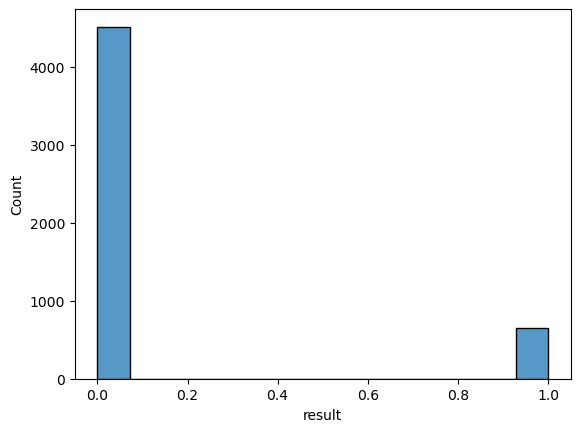

In [38]:
sns.histplot(df['result'])

<Axes: xlabel='character', ylabel='Count'>

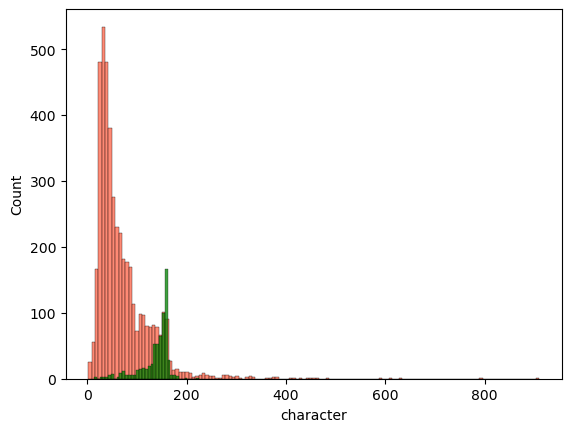

In [39]:
sns.histplot(df[df['result']==0]['character'],color="tomato")
sns.histplot(df[df['result']==1]['character'],color='green')

<Axes: xlabel='character', ylabel='Count'>

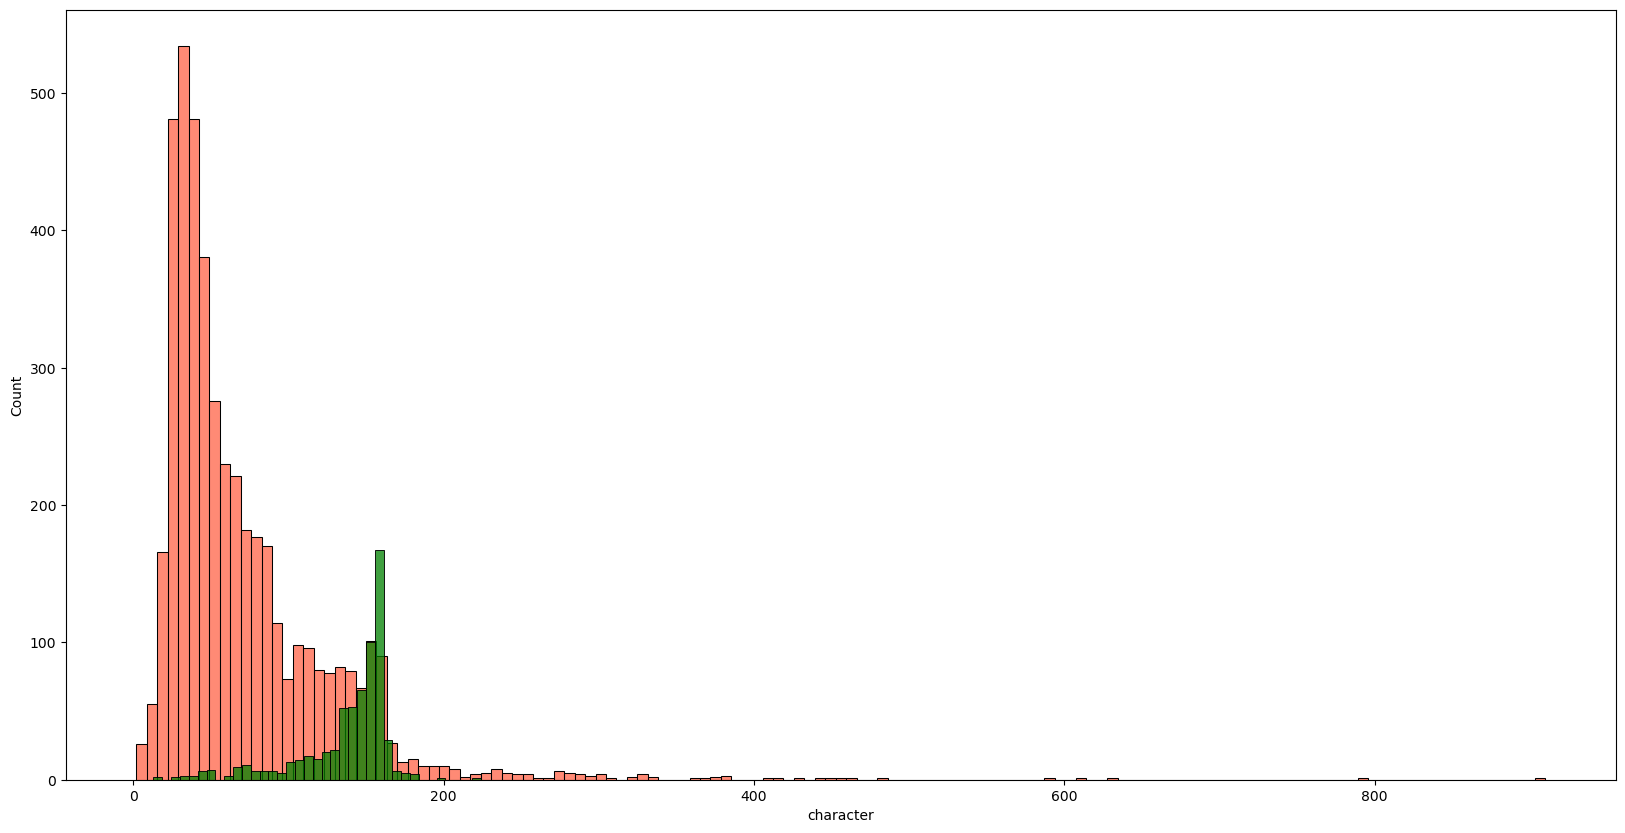

In [40]:
plot.figure(figsize=(20,10))
sns.histplot(df[df['result']==0]['character'],color="tomato")
sns.histplot(df[df['result']==1]['character'],color='green')

<Axes: xlabel='word', ylabel='Count'>

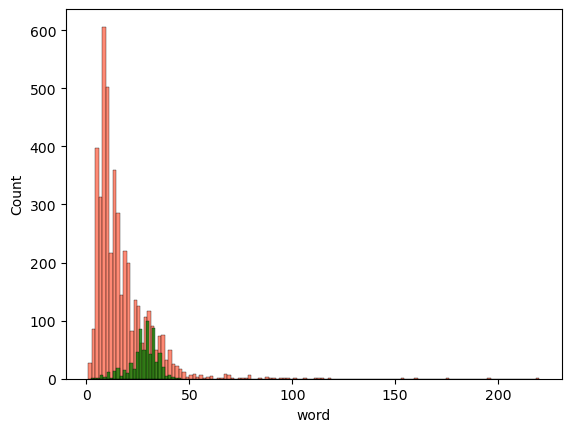

In [41]:
sns.histplot(df[df['result']==0]['word'],color="tomato")
sns.histplot(df[df['result']==1]['word'],color='green')

In [42]:
# sns.corr()

In [43]:
df.corr()  # corelation b/w data

C:\Users\hp\AppData\Local\Temp\ipykernel_10012\4284548808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()  # corelation b/w data


,result,character,word,sentences
result,1.000000,0.384717,0.262984,0.284901
character,0.384717,1.000000,0.965770,0.638143
word,0.262984,0.965770,1.000000,0.684541
sentences,0.284901,0.638143,0.684541,1.000000


In [44]:
"LES".lower()

'les'

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
stemPoerter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def textPreProcessing(text):
    text=text.lower() # converting in lower case
    text = nltk.word_tokenize(text)    # converting to word
#     print(text)
    
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)
    text = temp[:]    
    temp.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    text = temp[:]
    temp.clear()
    
    for i in text :
        temp.append(stemPoerter.stem(i))
    
    return " ".join(temp)

In [47]:
df["coded_data"] = df['msg'].apply(textPreProcessing)

C:\Users\hp\AppData\Local\Temp\ipykernel_10012\3634215040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coded_data"] = df['msg'].apply(textPreProcessing)


In [48]:
stemPoerter.stem("fees")

'fee'

In [49]:
df['msg']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 5169, dtype: object

In [50]:
df['msg'].apply(lambda x: stemPoerter.stem(x)).sample(4)

2584              hi happy birthday. hi hi hi hi hi hi hi
1077                          yep, by the pretty sculptur
5085    sorry i missed your call. can you please call ...
2013    great news! call freefone 08006344447 to claim...
Name: msg, dtype: object

In [51]:
df.head()

,result,msg,character,word,sentences,coded_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


A word cloud is a popular data visualization technique used to represent text data. It visually displays the most frequent words in a given text or set of texts, with the size of each word proportional to its frequency.

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=800,min_font_size=10,background_color="white")

In [53]:
spam_im_wc = wc.generate(df[df['result']==1]['coded_data'].str.cat(sep=" ")) # cat using for concatenation sep keyword pass for concatenate by probiding space

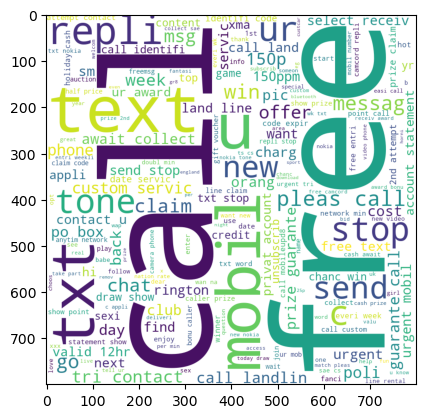

In [54]:
plot.imshow(spam_im_wc)

In [55]:
hamp_im_wc = wc.generate(df[df['result']==0]['coded_data'].str.cat(sep=" ")) # cat using for concatenation sep keyword pass for concatenate by probiding space

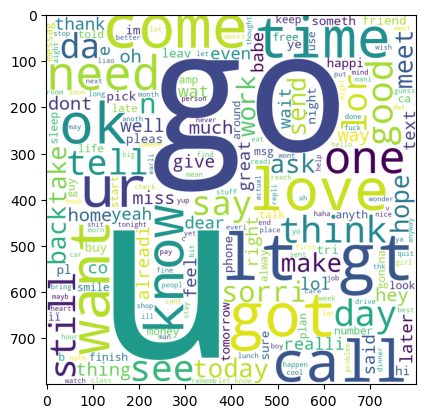

In [56]:
plot.imshow(hamp_im_wc)

In [57]:
spam_corpus=[]
for msg in df[df['result']==1]['coded_data'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

9939

The collections.Counter class is a powerful tool in Python for counting elements in an iterable (e.g., list, tuple, string, etc.). It returns a dictionary-like object where elements are keys, and their counts are the values.

In [59]:
from collections import Counter
Dictionary = Counter(spam_corpus).most_common(50)

In [60]:
DF = pd.DataFrame(Dictionary)

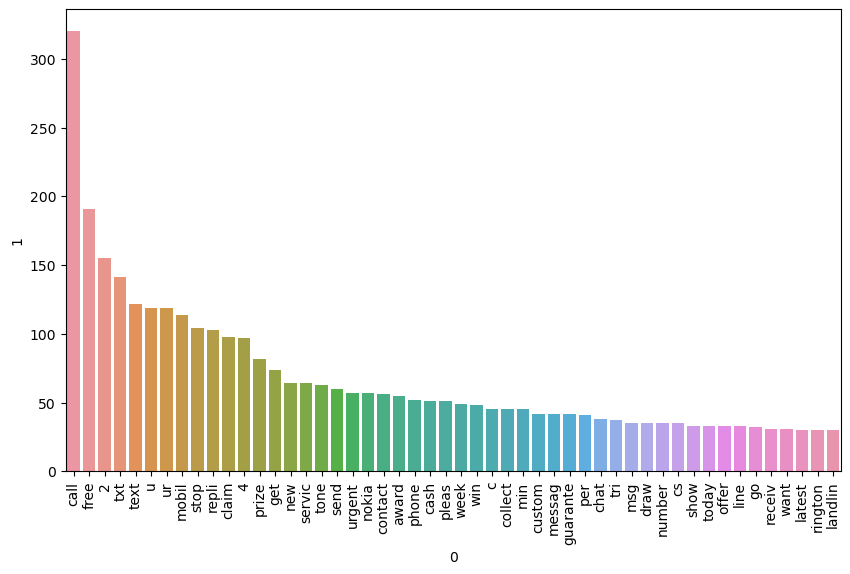

In [61]:
# DF.

# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plot.figure(figsize=(10, 6))
DAAAAA = pd.DataFrame(Counter(spam_corpus).most_common(50))
sns.barplot(x=0, y=1, data=DAAAAA)
plot.xticks(rotation='vertical')
plot.show()

In [62]:
ham_corpus=[]
for msg in df[df['result']==0]['coded_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(spam_corpus)

9939

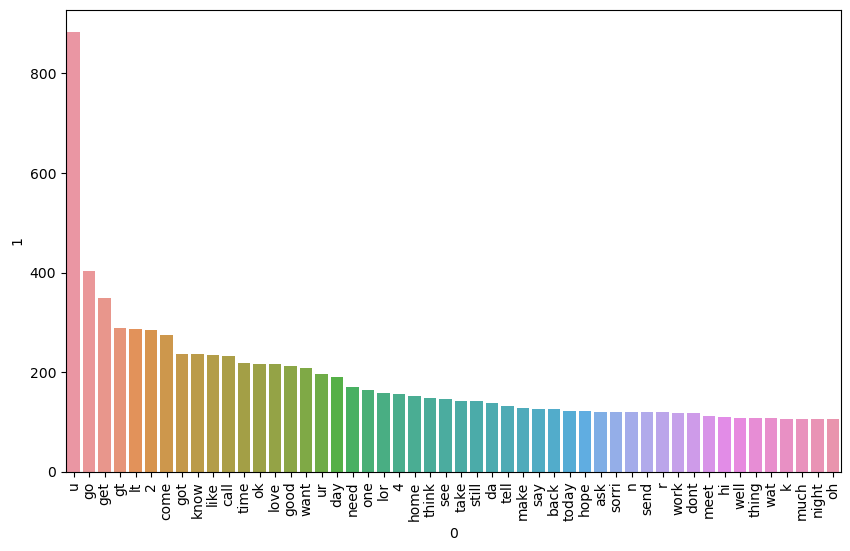

In [64]:
Dictionary = Counter(ham_corpus).most_common(50)
plot.figure(figsize=(10, 6))
DAAAAA = pd.DataFrame(Counter(ham_corpus).most_common(50))
sns.barplot(x=0, y=1, data=DAAAAA)
plot.xticks(rotation='vertical')
plot.show()

MODEL CREATION

In [65]:
df.head()

,result,msg,character,word,sentences,coded_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=2500)
X =tfidf.fit_transform(df['coded_data']).toarray()
X.shape

(5169, 2500)

In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
Y = df['result'].values

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8530549110595514
[[974 156]
 [ 34 129]]
0.45263157894736844


In [72]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9760247486465584
[[1130    0]
 [  31  132]]
1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9837587006960556
[[1128    2]
 [  19  144]]
0.9863013698630136


MultinomialNB give precision score 1 so be conclude it we can try more algorithm 

In [74]:
import pickle
pickle.dump(tfidf,open('vectroizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))

In [77]:
mnb.score(X_test,y_test)

0.9760247486465584